**Question 1**

Function 1 works correctly because of the double curly brace function. It is taking the unquoted column name, 
which in this case is 'type', as an argument for a later function. By using this function, R knows not to 
evaluate this function in a typical way. It can then be used later, outside of a dplyr function, without quotes.

**Question 2**

cd ~/Desktop
git clone https://github.com/livybaxley/my-first-binder.git

**Question 3**

    Using the "Connecting to GitHub with SSH" Guide on GitHub Docs (I have an older Mac)
ssh-keygen -t rsa -b 4096 -C "livybaxley0131@gmail.com"

    Adding the SSH private key to the ssh-agent and storing passphrase in the keychain
ssh-add --apple-use-keychain ~/.ssh/id_rsa

    Copied to Github
pbcopy < ~/.ssh/id_rsa.pub

**Question 4**

a) cd ~/Desktop/my-first-binder
   mkdir HW2
   echo "This is for homework 2." > HW2/HW.md

b) git add HW2
   git status
   
   On branch main
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   HW2/HW.md

c) git commit -m "Add HW2 directory with HW.md file"

d) echo "Homework 2" >> HW2/HW.md

e) git diff
*output*:
diff --git a/HW2/HW.md b/HW2/HW.md
index 1a010d3..e2025b2 100644
--- a/HW2/HW.md
+++ b/HW2/HW.md
@@ -1 +1,2 @@
 This is for homework 2.
+Homework 2

f) git status
*output*:
On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   HW2/HW.md
 
g) git add HW2/HW.md
git commit -m "Title for HW.md"
git log

    commit 55c91f1a5b8f2a1d2f733f114c0a5b28e5797d3f (HEAD -> main)
Author: Livy Baxley <livybaxley0131@gmail.com>
Date:   Tue Sep 9 18:15:23 2025 -0400

    Add title to HW.md

commit 2a3b9c7d4e1f8a9b6c0d5e4f3a2b1c0d9e8f7a6b
Author: Livy Baxley <livybaxley0131@gmail.com>
Date:   Tue Sep 9 18:13:48 2025 -0400

    Add HW2 directory and initial HW.md file

... (older commits may follow)

h) git help git log
git help git show

--since=<date>, --after=<date>
    Show commits more recent than a specific date.

    The format of the <date> string is interpreted in various ways. See
    the "DATE FORMATS" section in git-log(1) for more details.


In [60]:
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }

**Question 5**

In [61]:
patient_properties_df <- read.csv("~/Downloads/patient_properties.csv")
head(patient_properties_df, 10)

patient_names_df <- read.csv("~/Downloads/patient_names.csv")

# Convert columns using dplyr and lubridate
patient_names_df <- patient_names_df %>%
  mutate(across(c(BIRTHDATE, DEATHDATE), mdy))

head(patient_names_df, 10)

,ID,property,value
,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,MARITAL,M
2,5605b66b-e92d-c16c-1b83-b8bf7040d51f,RACE,white
3,5605b66b-e92d-c16c-1b83-b8bf7040d51f,ETHNICITY,nonhispanic
4,5605b66b-e92d-c16c-1b83-b8bf7040d51f,GENDER,F
5,6e5ae27c-8038-7988-e2c0-25a103f01bfa,MARITAL,M
6,6e5ae27c-8038-7988-e2c0-25a103f01bfa,RACE,white
7,6e5ae27c-8038-7988-e2c0-25a103f01bfa,ETHNICITY,nonhispanic
8,6e5ae27c-8038-7988-e2c0-25a103f01bfa,GENDER,M
9,8123d076-0886-9007-e956-d5864aa121a7,MARITAL,M


,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,2040-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts
3,8123d076-0886-9007-e956-d5864aa121a7,2058-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts
4,770518e4-6133-648e-60c9-071eb2f0e2ce,2028-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts
5,f96addf5-81b9-0aab-7855-d208d3d352c5,2028-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,2028-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts
7,183df435-4190-060e-8f8e-bf63c572b266,2057-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts
8,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts
9,217851b0-5f47-d376-18b9-0fe4ba77207e,2054-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts


**Question 6**

In [62]:
patient_properties_wide <- patient_properties_df %>%
  pivot_wider(id_cols = ID, names_from = property, values_from = value)

head(patient_properties_wider, 10)

ID,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M


**Question 7**

In [63]:
patient_names_properties_joined <- patient_names_df %>%
  left_join(patient_properties_wide, by = "ID")

head(patient_names_properties_joined, 10)

,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts,M,white,nonhispanic,F
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,2040-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts,M,white,nonhispanic,M
3,8123d076-0886-9007-e956-d5864aa121a7,2058-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts,M,white,nonhispanic,M
4,770518e4-6133-648e-60c9-071eb2f0e2ce,2028-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts,M,white,hispanic,M
5,f96addf5-81b9-0aab-7855-d208d3d352c5,2028-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts,M,white,hispanic,M
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,2028-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts,M,white,hispanic,M
7,183df435-4190-060e-8f8e-bf63c572b266,2057-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts,M,asian,nonhispanic,F
8,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts,M,white,nonhispanic,M
9,217851b0-5f47-d376-18b9-0fe4ba77207e,2054-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts,S,black,hispanic,M


**Question 8**

In [64]:
## the names have a three digit number at the end

patient_names_properties_joined <- patient_names_properties_joined %>%
   mutate(FIRST = str_remove(FIRST, "\\d{3}$"), LAST = str_remove(LAST, "\\d{3}$"))

head(patient_names_properties_joined, 10)

,ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita,Erdman,Quincy,Massachusetts,M,white,nonhispanic,F
2,6e5ae27c-8038-7988-e2c0-25a103f01bfa,2040-02-19,NA,Zane,Hodkiewicz,Boston,Massachusetts,M,white,nonhispanic,M
3,8123d076-0886-9007-e956-d5864aa121a7,2058-06-04,NA,Quinn,Marquardt,Quincy,Massachusetts,M,white,nonhispanic,M
4,770518e4-6133-648e-60c9-071eb2f0e2ce,2028-12-25,2017-09-29,Abel,Smitham,Boston,Massachusetts,M,white,hispanic,M
5,f96addf5-81b9-0aab-7855-d208d3d352c5,2028-12-25,2014-02-23,Edwin,Labadie,Boston,Massachusetts,M,white,hispanic,M
6,8e9650d1-788a-78f9-4a28-d08f7f95354a,2028-12-25,NA,Frankie,Oberbrunner,Boston,Massachusetts,M,white,hispanic,M
7,183df435-4190-060e-8f8e-bf63c572b266,2057-11-08,NA,Eilene,Walsh,Cambridge,Massachusetts,M,asian,nonhispanic,F
8,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell,Price,Quincy,Massachusetts,M,white,nonhispanic,M
9,217851b0-5f47-d376-18b9-0fe4ba77207e,2054-03-06,NA,Adrian,Gleason,Boston,Massachusetts,S,black,hispanic,M


**Question 9**

In [65]:
categorical_vars <- c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")
# Loop through each categorical variable
for (var in categorical_vars) {
  cat(sprintf("Counts of: %s\n", var))
  counts <- table(patient_names_properties_joined[[var]])
  sorted_properties_df <- sort(counts, decreasing = TRUE)
  
  mdpre(sorted_properties_df)
  cat("\n")
}

Counts of: CITY

        Boston         Quincy      Cambridge         Revere        Chelsea 
           541             80             45             42             39 
      Weymouth     Somerville        Hingham       Winthrop      Brookline 
            37             25             22             22             17 
       Everett           Hull        Medford      Braintree       Cohasset 
            16             15             13             10             10 
        Malden       Scituate         Newton       Stoneham North Scituate 
             8              8              6              5              3 
       Reading        Belmont      Lynnfield        Melrose         Milton 
             2              1              1              1              1 
       Norwell        Waltham      Watertown     Winchester 
             1              1              1              1 

Counts of: STATE
Massachusetts 
          974 

Counts of: MARITAL

   M    S Fine male 
 782  189  

**Question 10**

In [85]:
patient_df_cleaned <- patient_names_properties_joined %>%
    mutate(BIRTHDATE = if_else(
    year(BIRTHDATE) > year(today()),
    BIRTHDATE - years(100),
    BIRTHDATE
  )) %>%
  
filter(!MARITAL %in% c("Fine", "male")) %>%
  
# Recode multiple columns using across()
mutate(
    RACE = recode(RACE, "asiann" = "Asian","asian" = "Asian","white" = "White","black" = "Black","other" = "Other",
        "hawaiian" = "Hawaiian", "native" = "Native"),
    ETHNICITY = recode(ETHNICITY,"nonhispani" = "Nonhispanic","hispani" = "Hispanic","hispanic" = "Hispanic",
                       "nonhispanic" = "Nonhispanic"),
    GENDER = recode(GENDER,"F" = "Female","M" = "Male","female" = "Female","Female" = "Female","Male" = "Male"))

cat(sprintf(
"Date range for BIRTHDATE: %s to %s\n",
 min(patient_df_cleaned$BIRTHDATE, na.rm = TRUE),
 max(patient_df_cleaned$BIRTHDATE, na.rm = TRUE)
))
cat(sprintf(
 "Date range for DEATHDATE: %s to %s\n",
 min(patient_df_cleaned$DEATHDATE, na.rm = TRUE),
 max(patient_df_cleaned$DEATHDATE, na.rm = TRUE)
))
cat("\n")

# Loop through categorical variables to print counts
categorical_vars <- c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")

for (var in categorical_vars) {
  cat(sprintf("Counts of: %s\n", var))
  counts <- table(patient_df_cleaned[[var]], useNA = "ifany")
  sorted_counts <- sort(counts, decreasing = TRUE)
  mdpre(sorted_counts)
  cat("\n")
}

Date range for BIRTHDATE: 1926-05-28 to 2025-11-20
Date range for DEATHDATE: 2011-02-03 to 2022-01-27

Counts of: CITY

        Boston         Quincy      Cambridge         Revere        Chelsea 
           539             80             45             42             39 
      Weymouth     Somerville        Hingham       Winthrop      Brookline 
            37             25             22             22             17 
       Everett           Hull        Medford      Braintree       Cohasset 
            16             15             13             10             10 
        Malden       Scituate         Newton       Stoneham North Scituate 
             8              8              6              5              3 
       Reading        Belmont      Lynnfield        Melrose         Milton 
             2              1              1              1              1 
       Norwell        Waltham      Watertown     Winchester 
             1              1              1              1

**Question 11**

Date range for BIRTHDATE: 1926-05-28 to 2025-11-20
Date range for DEATHDATE: 2011-02-03 to 2022-01-27

Counts of: CITY

        Boston         Quincy      Cambridge         Revere        Chelsea 
           539             80             45             42             39 
      Weymouth     Somerville        Hingham       Winthrop      Brookline 
            37             25             22             22             17 
       Everett           Hull        Medford      Braintree       Cohasset 
            16             15             13             10             10 
        Malden       Scituate         Newton       Stoneham North Scituate 
             8              8              6              5              3 
       Reading        Belmont      Lynnfield        Melrose         Milton 
             2              1              1              1              1 
       Norwell        Waltham      Watertown     Winchester 
             1              1              1              1

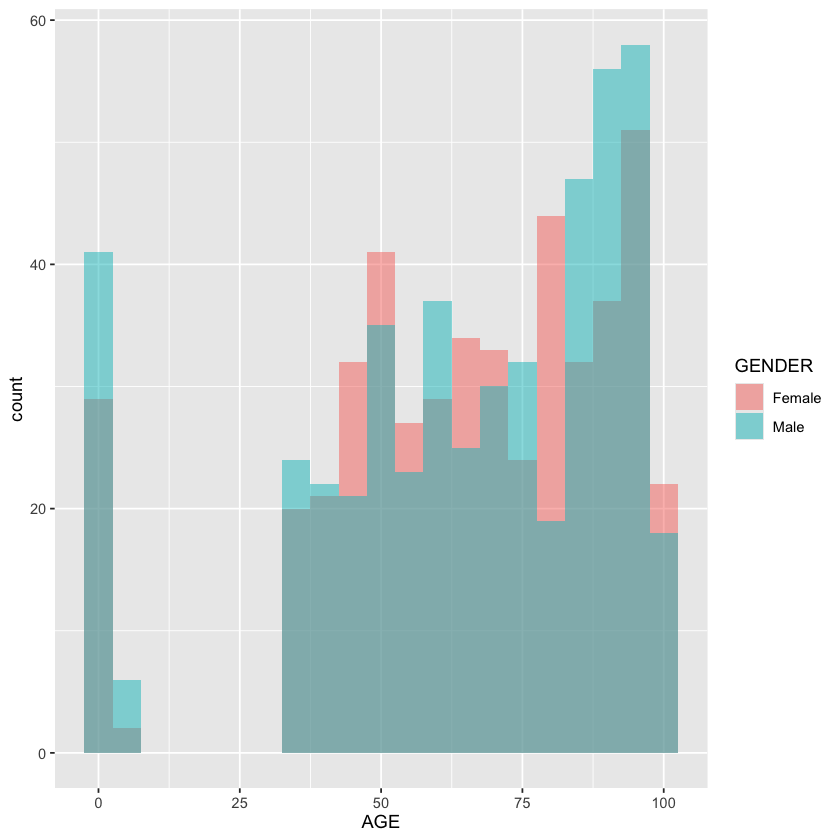

In [86]:
patient_df_cleaned <- patient_names_properties_joined %>%
    mutate(BIRTHDATE = if_else(
    year(BIRTHDATE) > year(today()),
    BIRTHDATE - years(100),
    BIRTHDATE
  )) %>%
  
mutate(AGE = floor(time_length(interval(BIRTHDATE, today()), "years"))) %>%

filter(!MARITAL %in% c("Fine", "male")) %>%
  
# Recode multiple columns using across()
mutate(
    RACE = recode(RACE, "asiann" = "Asian","asian" = "Asian","white" = "White","black" = "Black","other" = "Other",
        "hawaiian" = "Hawaiian", "native" = "Native"),
    ETHNICITY = recode(ETHNICITY,"nonhispani" = "Nonhispanic","hispani" = "Hispanic","hispanic" = "Hispanic",
                       "nonhispanic" = "Nonhispanic"),
    GENDER = recode(GENDER,"F" = "Female","M" = "Male","female" = "Female","Female" = "Female","Male" = "Male"))

cat(sprintf(
"Date range for BIRTHDATE: %s to %s\n",
 min(patient_df_cleaned$BIRTHDATE, na.rm = TRUE),
 max(patient_df_cleaned$BIRTHDATE, na.rm = TRUE)
))
cat(sprintf(
 "Date range for DEATHDATE: %s to %s\n",
 min(patient_df_cleaned$DEATHDATE, na.rm = TRUE),
 max(patient_df_cleaned$DEATHDATE, na.rm = TRUE)
))
cat("\n")

# Loop through categorical variables to print counts
categorical_vars <- c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")

for (var in categorical_vars) {
  cat(sprintf("Counts of: %s\n", var))
  counts <- table(patient_df_cleaned[[var]], useNA = "ifany")
  sorted_counts <- sort(counts, decreasing = TRUE)
  mdpre(sorted_counts)
  cat("\n")
}

ggplot(patient_df_cleaned, aes(x = AGE, fill = GENDER)) +
  geom_histogram(binwidth = 5, position = "identity", alpha = 0.5)

**Question 12**

Date range for BIRTHDATE: 1926-05-28 to 2025-11-20
Date range for DEATHDATE: 2011-02-03 to 2022-01-27

Counts of: CITY

        Boston         Quincy      Cambridge         Revere        Chelsea 
           539             80             45             42             39 
      Weymouth     Somerville        Hingham       Winthrop      Brookline 
            37             25             22             22             17 
       Everett           Hull        Medford      Braintree       Cohasset 
            16             15             13             10             10 
        Malden       Scituate         Newton       Stoneham North Scituate 
             8              8              6              5              3 
       Reading        Belmont      Lynnfield        Melrose         Milton 
             2              1              1              1              1 
       Norwell        Waltham      Watertown     Winchester 
             1              1              1              1

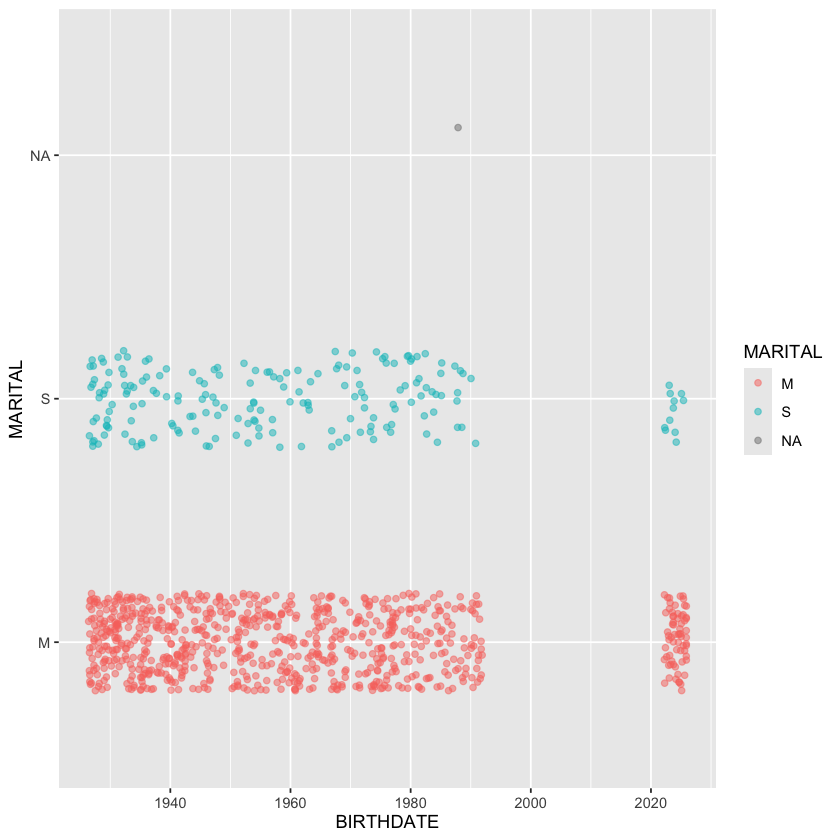

In [92]:
patient_df_cleaned <- patient_names_properties_joined %>%
    mutate(BIRTHDATE = if_else(
    year(BIRTHDATE) > year(today()),
    BIRTHDATE - years(100),
    BIRTHDATE
  )) %>%
  
mutate(AGE = floor(time_length(interval(BIRTHDATE, today()), "years"))) %>%

filter(!MARITAL %in% c("Fine", "male")) %>%
  
# Recode multiple columns using across()
mutate(
    RACE = recode(RACE, "asiann" = "Asian","asian" = "Asian","white" = "White","black" = "Black","other" = "Other",
        "hawaiian" = "Hawaiian", "native" = "Native"),
    ETHNICITY = recode(ETHNICITY,"nonhispani" = "Nonhispanic","hispani" = "Hispanic","hispanic" = "Hispanic",
                       "nonhispanic" = "Nonhispanic"),
    GENDER = recode(GENDER,"F" = "Female","M" = "Male","female" = "Female","Female" = "Female","Male" = "Male"))

cat(sprintf(
"Date range for BIRTHDATE: %s to %s\n",
 min(patient_df_cleaned$BIRTHDATE, na.rm = TRUE),
 max(patient_df_cleaned$BIRTHDATE, na.rm = TRUE)
))
cat(sprintf(
 "Date range for DEATHDATE: %s to %s\n",
 min(patient_df_cleaned$DEATHDATE, na.rm = TRUE),
 max(patient_df_cleaned$DEATHDATE, na.rm = TRUE)
))
cat("\n")

# Loop through categorical variables to print counts
categorical_vars <- c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")

for (var in categorical_vars) {
  cat(sprintf("Counts of: %s\n", var))
  counts <- table(patient_df_cleaned[[var]], useNA = "ifany")
  sorted_counts <- sort(counts, decreasing = TRUE)
  mdpre(sorted_counts)
  cat("\n")
}

ggplot(patient_df_cleaned, aes(x = MARITAL, y = BIRTHDATE, color = MARITAL)) +
  geom_jitter(alpha = 0.5, width = 0.2, height = 0) + coord_flip()